In [1]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
dt = pd.read_csv('./cartier_catalog.csv')
dt.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


# 1-What kind of jewelry is used in the products?

In [2]:
dt.tags.value_counts()

white gold, diamonds                                              121
pink gold, diamonds                                               100
yellow gold, diamonds                                              60
yellow gold                                                        45
pink gold                                                          38
                                                                 ... 
white gold, lacquer, tsavorite garnets, onyx                        1
yellow gold, diamonds, tsavorite garnets, onyx                      1
white gold, emeralds, sapphires, mother-of-pearl, diamonds          1
pink gold, tsavorite garnets, onyx, black lacquer, diamonds         1
white gold, sapphires, emeralds, onyx, black ceramic, diamonds      1
Name: tags, Length: 103, dtype: int64

In [9]:
dt['type_split']=dt['tags'].str.split(',')

In [10]:
dt.head()

,ref,categorie,title,price,tags,description,image,type_split
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,[yellow gold]
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,[platinum]
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,[pink gold]
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,[white gold]
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,[yellow gold]


# Split components in type_split 

In [14]:
dt['metal']=dt.type_split.str.get(0).str.strip()
dt['first_gem']=dt.type_split.str.get(1).str.strip()
dt['second_gem']=dt.type_split.str.get(2).str.strip()
dt['third_gem']=dt.type_split.str.get(3).str.strip()
dt['fourth_gem']=dt.type_split.str.get(4).str.strip()
dt.fillna(0, inplace=True)
del dt['type_split']

In [15]:
dt.head()

,ref,categorie,title,price,tags,description,image,metal,first_gem,second_gem,third_gem,fourth_gem
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,yellow gold,0,0,0,0
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,platinum,0,0,0,0
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,pink gold,0,0,0,0
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,white gold,0,0,0,0
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,yellow gold,0,0,0,0


In [16]:
dt.drop(['image','tags','ref','title', 'description'],axis=1,inplace=True)

dt.head()

,categorie,price,metal,first_gem,second_gem,third_gem,fourth_gem
0,rings,1650.0,yellow gold,0,0,0,0
1,rings,3650.0,platinum,0,0,0,0
2,rings,1650.0,pink gold,0,0,0,0
3,rings,1770.0,white gold,0,0,0,0
4,rings,1070.0,yellow gold,0,0,0,0


In [17]:
gems=pd.concat([dt['first_gem'],dt['second_gem'],dt['third_gem'],dt['fourth_gem']],axis=0)
gems

0      0
1      0
2      0
3      0
4      0
      ..
687    0
688    0
689    0
690    0
691    0
Length: 2768, dtype: object

In [20]:
gems_value=gems.value_counts()[1:].to_frame()
gems_value.reset_index(inplace=True)
gems_value

,index,0
0,diamonds,431
1,onyx,90
2,emeralds,70
3,diamond,61
4,pink gold,37
5,yellow gold,37
6,tsavorite garnets,35
7,sapphires,19
8,ceramic,17
9,lacquer,11


In [21]:
gems_value.columns=['gem_type','count']
gems_value

,gem_type,count
0,diamonds,431
1,onyx,90
2,emeralds,70
3,diamond,61
4,pink gold,37
5,yellow gold,37
6,tsavorite garnets,35
7,sapphires,19
8,ceramic,17
9,lacquer,11


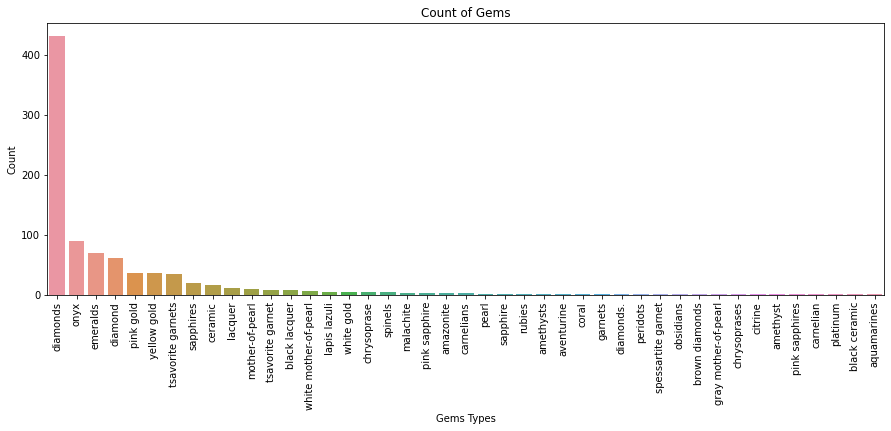

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x='gem_type',y='count',data=gems_value)
plt.xlabel("Gems Types")
plt.ylabel("Count")
plt.title("Count of Gems")
plt.xticks(rotation=90)
plt.show()

# 2- Which metal is used the most?

In [31]:
metal_categorie=dt.groupby('categorie')['metal'].value_counts().to_frame()
metal_categorie.columns=['count']
metal_categorie.reset_index(level=[0,1],inplace=True)

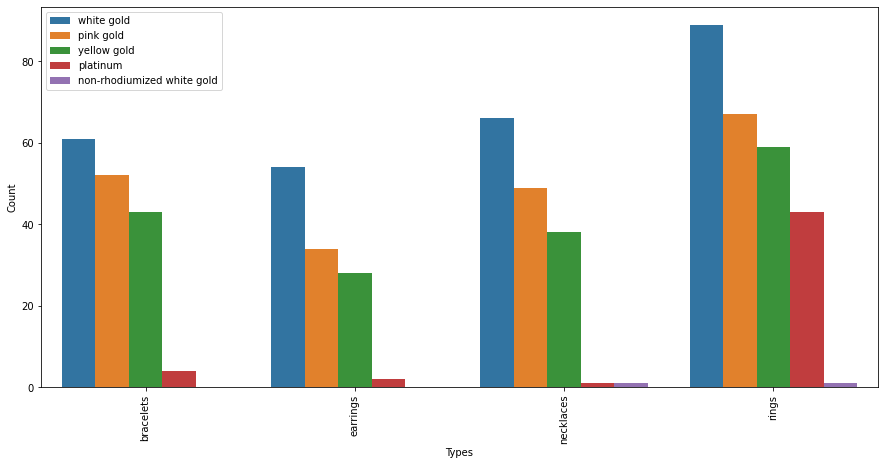

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie',y='count',hue='metal',data=metal_categorie)
plt.xlabel("Types")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

# 3- What is the average price of jewelry by metal? 

In [36]:
gp1=dt.groupby(['categorie','metal'])['price'].mean().round(2).to_frame()
gp1=gp1.reset_index()
gp1

,categorie,metal,price
0,bracelets,pink gold,28741.92
1,bracelets,platinum,209250.00
2,bracelets,white gold,50363.28
3,bracelets,yellow gold,39504.42
4,earrings,pink gold,8146.47
5,earrings,platinum,117000.00
6,earrings,white gold,36350.56
7,earrings,yellow gold,11328.21
8,necklaces,non-rhodiumized white gold,19700.00
9,necklaces,pink gold,18284.49


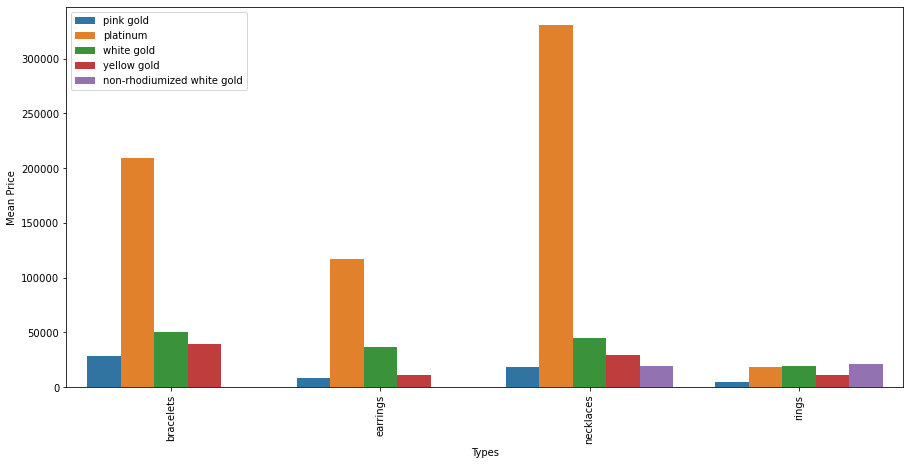

In [37]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie',y='price',hue='metal',data=gp1)
plt.xlabel("Types")
plt.ylabel("Mean Price")
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

 # 4- What is the average price of each metal ?

In [40]:
gp2=dt.groupby('metal')['price'].mean().round(2).to_frame()
gp2.reset_index(inplace=True)
gp2

,metal,price
0,non-rhodiumized white gold,20550.00
1,pink gold,14917.13
2,platinum,44084.40
3,white gold,35855.22
4,yellow gold,22524.23


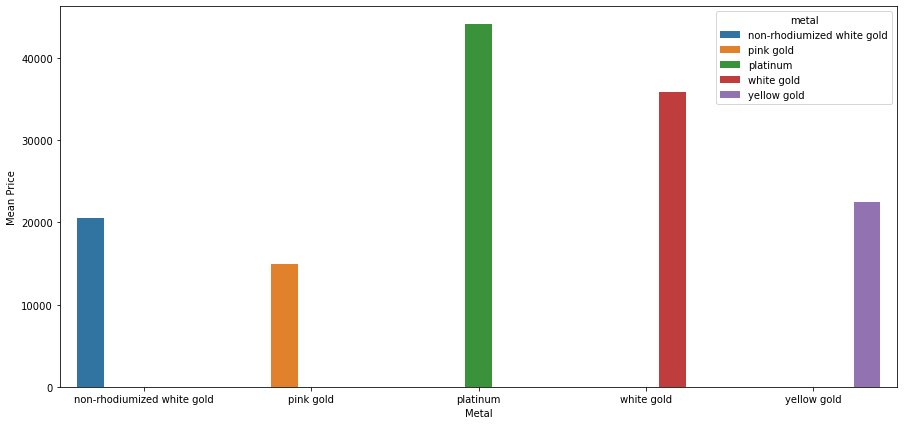

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x='metal',y='price',hue='metal',data=gp2)
plt.xlabel("Metal")
plt.ylabel("Mean Price")
plt.show()

# 5- How many jewelry are in each product type?


In [42]:
gp3=dt.groupby('categorie')['first_gem'].value_counts().to_frame()
gp3.columns=['count']
gp3.reset_index(level=[0,1],inplace=True)

In [49]:
gp3

,categorie,first_gem,count
0,bracelets,diamonds,68
1,bracelets,NaN,32
2,bracelets,emeralds,15
3,bracelets,diamond,10
4,bracelets,tsavorite garnets,7
...,...,...,...
68,rings,chrysoprase,1
69,rings,coral,1
70,rings,pink gold,1
71,rings,sapphire,1


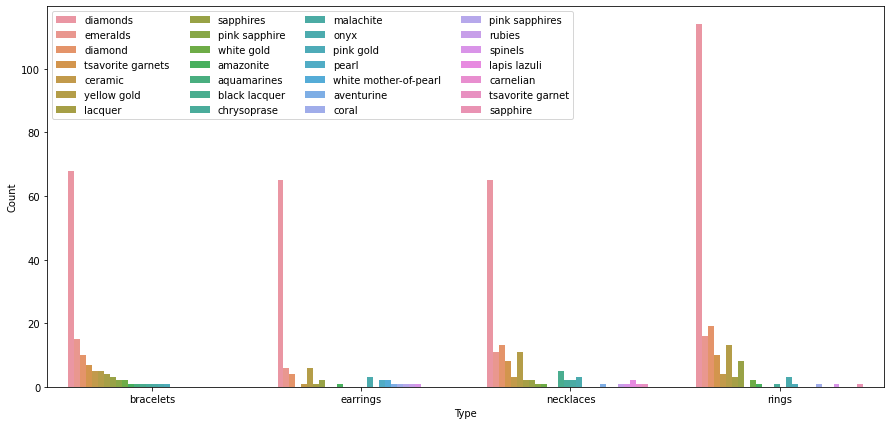

In [50]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie',y='count',hue='first_gem',data=gp3)
plt.xlabel("Type")
plt.ylabel("Count")
plt.legend(ncol=4,loc='upper left')
plt.show()

# 6-Average value of jewelry in each product category?

In [51]:
gp4=dt.groupby(['categorie','first_gem'])['price'].mean().round(2).to_frame()
gp4=gp4.reset_index()
gp4=gp4[gp4['first_gem']!=0]
gp4

,categorie,first_gem,price
1,bracelets,amazonite,56000.00
2,bracelets,aquamarines,8250.00
3,bracelets,black lacquer,35000.00
4,bracelets,ceramic,13258.00
5,bracelets,chrysoprase,68500.00
...,...,...,...
68,rings,sapphires,68157.50
69,rings,spinels,18500.00
70,rings,tsavorite garnets,8890.00
71,rings,white gold,4975.00


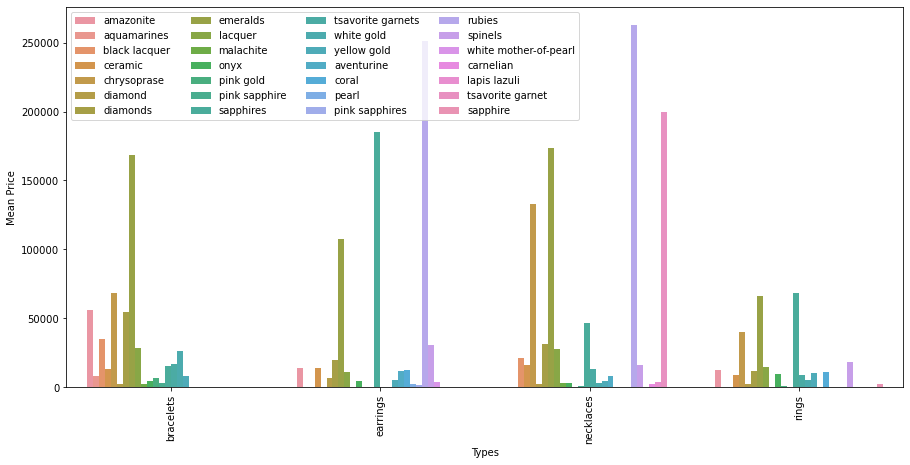

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie',y='price',hue='first_gem',data=gp4)
plt.xlabel("Types")
plt.ylabel("Mean Price")
plt.legend(ncol=4,loc='upper left')
plt.xticks(rotation=90)
plt.show()

# 7- Top most expensive jewelry?

In [57]:
gp5=dt.groupby('first_gem')['price'].mean().round(2).to_frame()
gp5.reset_index(inplace=True)
gp5=gp5[gp5['first_gem']!=0]
gp5=gp5.sort_values(by=['price']).head(5)
gp5

,first_gem,price
19,pink sapphires,1420.0
16,pearl,2150.0
5,carnelian,2180.0
18,pink sapphire,2300.0
21,sapphire,2380.0


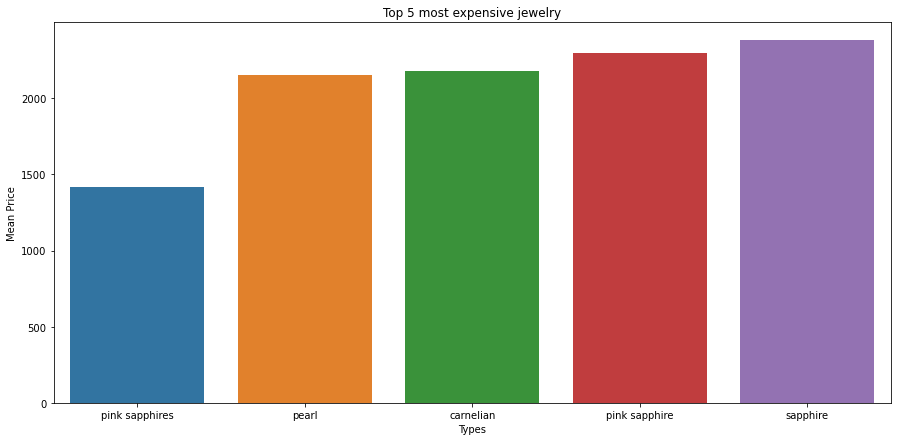

In [60]:
plt.figure(figsize=(15,7))
sns.barplot(x='first_gem',y='price',data=gp5)
plt.xlabel("Types")
plt.ylabel("Mean Price")

plt.title("Top 5 most expensive jewelry")
plt.show()